In [1]:
import pandas as pd

In [4]:
#pip install git+https://github.com/quantopian/pyfolio
# import again if first time not work
import pyfolio

In [2]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

In [3]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    #df=df.dropna()
    print('Sharpe: ',(252**0.5)*df['daily_return'].mean()/ df['daily_return'].std())
    return df

In [4]:
def backtest_strat(df):
    strategy_ret= df.copy()
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['Date'])
    strategy_ret.set_index('Date', drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

In [7]:
def get_account_value(model_name):
    df_account_value=pd.DataFrame()
    for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
        temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format(model_name,i))
        df_account_value = df_account_value.append(temp,ignore_index=True)
    df_account_value = pd.DataFrame({'account_value':df_account_value['0']})
    sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
    print(sharpe)
    df_account_value=df_account_value.join(df_trade_date[63:].reset_index(drop=True))
    return df_account_value

## DJIA

In [18]:
dji = pd.read_csv("data/^DJI.csv")
test_dji=dji[(dji['Date']>='2018-09-04') & (dji['Date']<='2020-06-30')] # 2016-01-01
test_dji = test_dji.reset_index(drop=True)

In [19]:
test_dji.shape

(459, 7)

In [20]:
test_dji.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-04,25916.070313,25971.769531,25805.949219,25952.480469,25952.480469,254600000
1,2018-09-05,25919.839844,26011.220703,25871.039063,25974.990234,25974.990234,289210000
2,2018-09-06,25973.019531,26073.679688,25880.839844,25995.869141,25995.869141,262380000
3,2018-09-07,25951.019531,26002.990234,25818.390625,25916.539063,25916.539063,281350000
4,2018-09-10,25991.910156,26039.960938,25854.130859,25857.070313,25857.070313,252170000


In [21]:
test_dji['daily_return']=test_dji['Adj Close'].pct_change(1)

In [22]:
dow_strat = backtest_strat(test_dji)

In [97]:
dow_strat

Date
2018-09-04 00:00:00+00:00         NaN
2018-09-05 00:00:00+00:00    0.000867
2018-09-06 00:00:00+00:00    0.000804
2018-09-07 00:00:00+00:00   -0.003052
2018-09-10 00:00:00+00:00   -0.002295
                               ...   
2020-06-24 00:00:00+00:00   -0.027151
2020-06-25 00:00:00+00:00    0.011776
2020-06-26 00:00:00+00:00   -0.028356
2020-06-29 00:00:00+00:00    0.023196
2020-06-30 00:00:00+00:00    0.008481
Length: 459, dtype: float64

In [100]:
spx = pd.read_csv('E:/ucb/code/capstone/FinRL-Trading/SPX.csv',index_col=0)

In [101]:
spx_df = spx[(spx['date']>='2018-12-03') & (spx['date']<='2021-06-01')]

In [102]:
spx_df = spx_df.rename(columns={'date': 'Date'})

In [103]:
spx_df['daily_return']=spx_df['close'].pct_change(1)

In [105]:
spx_df = spx_df.iloc[1:].reset_index(drop=True)
spx_df

,Date,close,daily_return
0,2018-12-04,2700.060059,-0.032365
1,2018-12-06,2695.949951,-0.001522
2,2018-12-07,2633.080078,-0.023320
3,2018-12-10,2637.719971,0.001762
4,2018-12-11,2636.780029,-0.000356
...,...,...,...
621,2021-05-25,4188.129883,-0.002125
622,2021-05-26,4195.990234,0.001877
623,2021-05-27,4200.879883,0.001165
624,2021-05-28,4204.109863,0.000769


In [106]:
spx_strat = backtest_strat(spx_df)

In [107]:
spx_strat

Date
2018-12-04 00:00:00+00:00   -0.032365
2018-12-06 00:00:00+00:00   -0.001522
2018-12-07 00:00:00+00:00   -0.023320
2018-12-10 00:00:00+00:00    0.001762
2018-12-11 00:00:00+00:00   -0.000356
                               ...   
2021-05-25 00:00:00+00:00   -0.002125
2021-05-26 00:00:00+00:00    0.001877
2021-05-27 00:00:00+00:00    0.001165
2021-05-28 00:00:00+00:00    0.000769
2021-06-01 00:00:00+00:00   -0.000492
Length: 626, dtype: float64

## Ensemble Strategy

In [5]:
df=pd.read_csv('data/dow_30_2009_2020.csv')

In [ ]:
rebalance_window = 63
validation_window = 63
unique_trade_date = df[(df.datadate > 20151001)&(df.datadate <= 20200707)].datadate.unique()


In [108]:
unique_trade_date = spx_df[(spx_df.Date > '2018-09-04')&(spx_df.Date <= '2021-06-01')].Date.unique()

In [109]:
import numpy as np
unique_trade_date = np.array([int(date.replace('-', '')) for date in unique_trade_date])
unique_trade_date

array([20181204, 20181206, 20181207, 20181210, 20181211, 20181212,
       20181213, 20181214, 20181217, 20181218, 20181219, 20181220,
       20181221, 20181224, 20181226, 20181227, 20181228, 20181231,
       20190102, 20190103, 20190104, 20190107, 20190108, 20190109,
       20190110, 20190111, 20190114, 20190115, 20190116, 20190117,
       20190118, 20190122, 20190123, 20190124, 20190125, 20190128,
       20190129, 20190130, 20190131, 20190201, 20190204, 20190205,
       20190206, 20190207, 20190208, 20190211, 20190212, 20190213,
       20190214, 20190215, 20190219, 20190220, 20190221, 20190222,
       20190225, 20190226, 20190227, 20190228, 20190301, 20190304,
       20190305, 20190306, 20190307, 20190308, 20190311, 20190312,
       20190313, 20190314, 20190315, 20190318, 20190319, 20190320,
       20190321, 20190322, 20190325, 20190326, 20190327, 20190328,
       20190329, 20190401, 20190402, 20190403, 20190404, 20190405,
       20190408, 20190409, 20190410, 20190411, 20190412, 20190

In [110]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

In [111]:
df_trade_date

,datadate
0,20181204
1,20181206
2,20181207
3,20181210
4,20181211
...,...
621,20210525
622,20210526
623,20210527
624,20210528


In [112]:
def get_account_value(model_name):
    df_account_value=pd.DataFrame()
    for i in range(26, 35):
        temp = pd.read_csv('E:/ucb/code/capstone/FinRL-Trading/DRL-for-Trading/results/account_value_trade_{}_{}.csv'.format(model_name,i))
        df_account_value = pd.concat([df_account_value,temp])
    df_account_value = pd.DataFrame({'account_value':df_account_value['0']})
    sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
    print(sharpe)
    df_account_value = df_account_value.reset_index(drop=True)
    df_account_value=df_account_value.join(df_trade_date[:].reset_index(drop=True))
    return df_account_value

In [113]:
ensemble_account_value = get_account_value('ensemble')

0.8193889888327185


In [114]:
ensemble_account_value

,account_value,datadate
0,1.014695e+06,20181204
1,9.950755e+05,20181206
2,9.941068e+05,20181207
3,9.809486e+05,20181210
4,9.886902e+05,20181211
...,...,...
557,1.470118e+06,20210223
558,1.477005e+06,20210224
559,1.482420e+06,20210225
560,1.452601e+06,20210226


<Axes: >

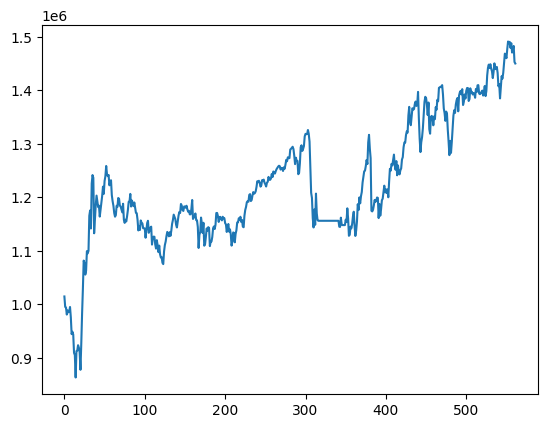

In [115]:
ensemble_account_value.account_value.plot()

In [116]:
ensemble_account_value = get_daily_return(ensemble_account_value)

Sharpe:  0.8193889888327185


In [119]:
ensemble_account_value['Date'] = spx_df['Date']

In [121]:
ensemble_account_value.head()

,account_value,datadate,daily_return,Date
0,1.014695e+06,20181204,NaN,2018-12-04
1,9.950755e+05,20181206,-0.019335,2018-12-06
2,9.941068e+05,20181207,-0.000974,2018-12-07
3,9.809486e+05,20181210,-0.013236,2018-12-10
4,9.886902e+05,20181211,0.007892,2018-12-11


In [122]:
ensemble_strat = backtest_strat(ensemble_account_value) #[0:1097]

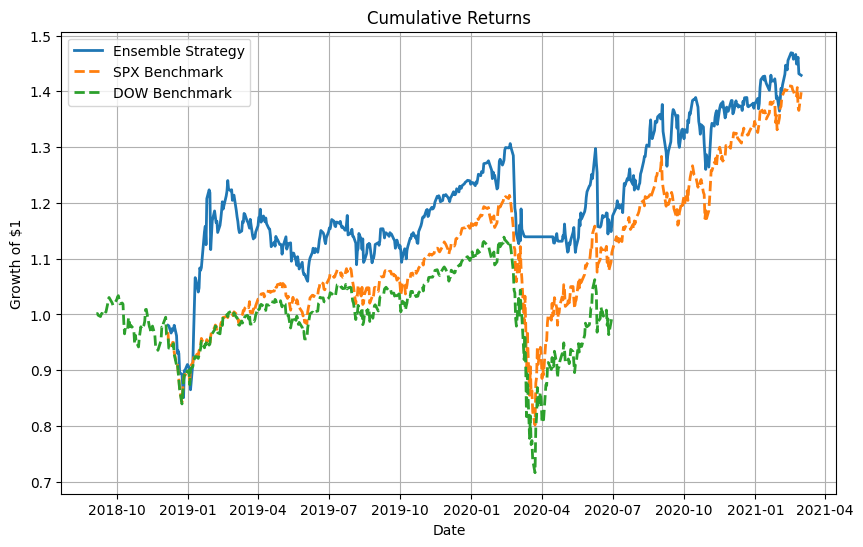

== Ensemble Strategy ==
Annualized Return:    17.35%
Annualized Volatility: 22.71%
Sharpe Ratio:          0.73

== SPX Benchmark ==
Annualized Return:    16.22%
Annualized Volatility: 25.52%
Sharpe Ratio:          0.64


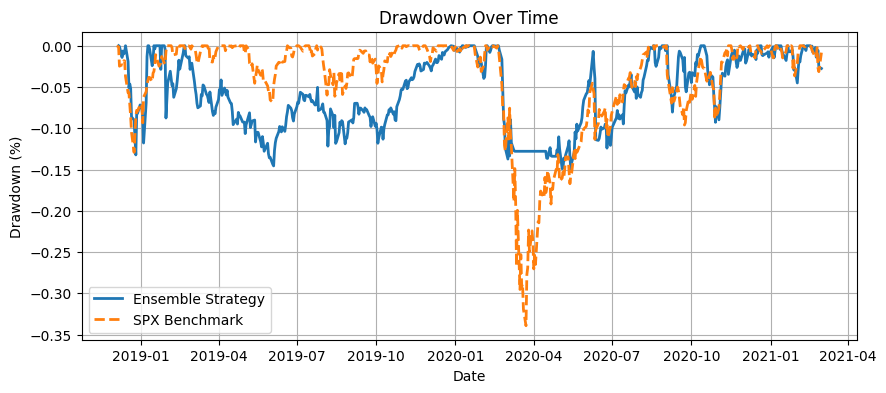

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###################################
# 1) PREPARE DATA
###################################
# Ensure that ensemble_strat and dow_strat have the same date index
ensemble_strat, spx_strat = ensemble_strat.align(spx_strat, join='inner')

# Compute cumulative returns for both strategies
ensemble_cum = (1 + ensemble_strat).cumprod()
spx_cum = (1 + spx_strat).cumprod()
dow_cum = (1 + dow_strat).cumprod()

###################################
# 2) CUMULATIVE RETURNS PLOT
###################################
plt.figure(figsize=(10, 6))
plt.plot(ensemble_cum.index, ensemble_cum, label='Ensemble Strategy', linewidth=2)
plt.plot(spx_cum.index, spx_cum, label='SPX Benchmark', linestyle="dashed", linewidth=2)
plt.plot(dow_cum.index, dow_cum, label='DOW Benchmark', linestyle="dashed", linewidth=2)
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Growth of $1')
plt.legend()
plt.grid(True)
plt.show()

###################################
# 3) PERFORMANCE METRICS
###################################
def annualized_return(returns, freq=252):
    """Compute annualized return from daily returns."""
    total_ret = (1 + returns).prod() - 1
    years = len(returns) / freq
    return (1 + total_ret)**(1 / years) - 1

def annualized_volatility(returns, freq=252):
    """Annualized volatility."""
    return returns.std() * np.sqrt(freq)

def sharpe_ratio(returns, rf_rate=0.02, freq=252):
    """Compute Sharpe Ratio (assuming 2% risk-free rate)."""
    daily_rf = rf_rate / freq
    excess_ret = returns - daily_rf
    return (excess_ret.mean() / excess_ret.std()) * np.sqrt(freq)

ensemble_ar = annualized_return(ensemble_strat)
ensemble_av = annualized_volatility(ensemble_strat)
ensemble_sr = sharpe_ratio(ensemble_strat)

dow_ar = annualized_return(spx_strat)
dow_av = annualized_volatility(spx_strat)
dow_sr = sharpe_ratio(spx_strat)

print("== Ensemble Strategy ==")
print(f"Annualized Return:    {ensemble_ar:.2%}")
print(f"Annualized Volatility: {ensemble_av:.2%}")
print(f"Sharpe Ratio:          {ensemble_sr:.2f}")

print("\n== SPX Benchmark ==")
print(f"Annualized Return:    {dow_ar:.2%}")
print(f"Annualized Volatility: {dow_av:.2%}")
print(f"Sharpe Ratio:          {dow_sr:.2f}")

###################################
# 4) DRAWDOWN PLOT
###################################
def drawdown(returns):
    """Compute the percentage drawdown."""
    cum_returns = (1 + returns).cumprod()
    high_watermark = cum_returns.cummax()
    dd = (cum_returns - high_watermark) / high_watermark
    return dd

ensemble_dd = drawdown(ensemble_strat)
dow_dd = drawdown(spx_strat)

plt.figure(figsize=(10, 4))
plt.plot(ensemble_dd.index, ensemble_dd, label='Ensemble Strategy', linewidth=2)
plt.plot(dow_dd.index, dow_dd, label='SPX Benchmark', linestyle="dashed", linewidth=2)
plt.title('Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')
plt.legend()
plt.grid(True)
plt.show()

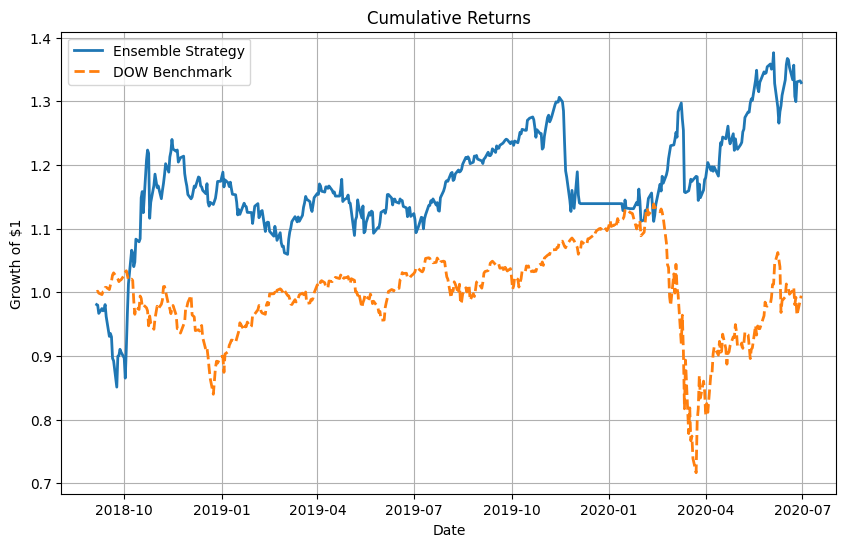

== Ensemble Strategy ==
Annualized Return:    16.92%
Annualized Volatility: 23.87%
Sharpe Ratio:          0.69

== DOW Benchmark ==
Annualized Return:    -0.30%
Annualized Volatility: 28.89%
Sharpe Ratio:          0.07


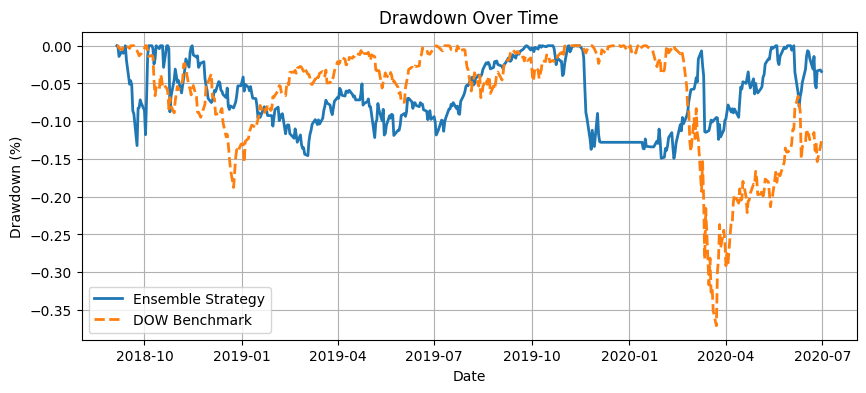

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###################################
# 1) PREPARE DATA
###################################
# Ensure that ensemble_strat and dow_strat have the same date index
ensemble_strat, dow_strat = ensemble_strat.align(dow_strat, join='inner')

# Compute cumulative returns for both strategies
ensemble_cum = (1 + ensemble_strat).cumprod()
dow_cum = (1 + dow_strat).cumprod()

###################################
# 2) CUMULATIVE RETURNS PLOT
###################################
plt.figure(figsize=(10, 6))
plt.plot(ensemble_cum.index, ensemble_cum, label='Ensemble Strategy', linewidth=2)
plt.plot(dow_cum.index, dow_cum, label='DOW Benchmark', linestyle="dashed", linewidth=2)
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Growth of $1')
plt.legend()
plt.grid(True)
plt.show()

###################################
# 3) PERFORMANCE METRICS
###################################
def annualized_return(returns, freq=252):
    """Compute annualized return from daily returns."""
    total_ret = (1 + returns).prod() - 1
    years = len(returns) / freq
    return (1 + total_ret)**(1 / years) - 1

def annualized_volatility(returns, freq=252):
    """Annualized volatility."""
    return returns.std() * np.sqrt(freq)

def sharpe_ratio(returns, rf_rate=0.02, freq=252):
    """Compute Sharpe Ratio (assuming 2% risk-free rate)."""
    daily_rf = rf_rate / freq
    excess_ret = returns - daily_rf
    return (excess_ret.mean() / excess_ret.std()) * np.sqrt(freq)

ensemble_ar = annualized_return(ensemble_strat)
ensemble_av = annualized_volatility(ensemble_strat)
ensemble_sr = sharpe_ratio(ensemble_strat)

dow_ar = annualized_return(dow_strat)
dow_av = annualized_volatility(dow_strat)
dow_sr = sharpe_ratio(dow_strat)

print("== Ensemble Strategy ==")
print(f"Annualized Return:    {ensemble_ar:.2%}")
print(f"Annualized Volatility: {ensemble_av:.2%}")
print(f"Sharpe Ratio:          {ensemble_sr:.2f}")

print("\n== DOW Benchmark ==")
print(f"Annualized Return:    {dow_ar:.2%}")
print(f"Annualized Volatility: {dow_av:.2%}")
print(f"Sharpe Ratio:          {dow_sr:.2f}")

###################################
# 4) DRAWDOWN PLOT
###################################
def drawdown(returns):
    """Compute the percentage drawdown."""
    cum_returns = (1 + returns).cumprod()
    high_watermark = cum_returns.cummax()
    dd = (cum_returns - high_watermark) / high_watermark
    return dd

ensemble_dd = drawdown(ensemble_strat)
dow_dd = drawdown(dow_strat)

plt.figure(figsize=(10, 4))
plt.plot(ensemble_dd.index, ensemble_dd, label='Ensemble Strategy', linewidth=2)
plt.plot(dow_dd.index, dow_dd, label='DOW Benchmark', linestyle="dashed", linewidth=2)
plt.title('Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
#ensemble_account_value.to_csv('results/df_account_value_ensemble_daily_return.csv',index=False)

Start date,2016-01-04
End date,2020-05-12
Total months,52
,Backtest
Annual return,13.162%
Cumulative returns,71.305%
Annual volatility,7.868%
Sharpe ratio,1.61
Calmar ratio,2.28
Stability,0.90
Max drawdown,-5.772%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,5.77,2016-02-01,2016-02-11,2016-02-25,19
1,5.00,2016-07-14,2016-10-17,2016-11-10,86
2,4.96,2017-03-01,2017-04-13,2017-10-04,156
3,4.34,2018-06-12,2018-06-28,2019-02-04,170
4,3.85,2016-06-23,2016-06-27,2016-06-30,6


/Users/hongyangyang/anaconda3/lib/python3.6/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


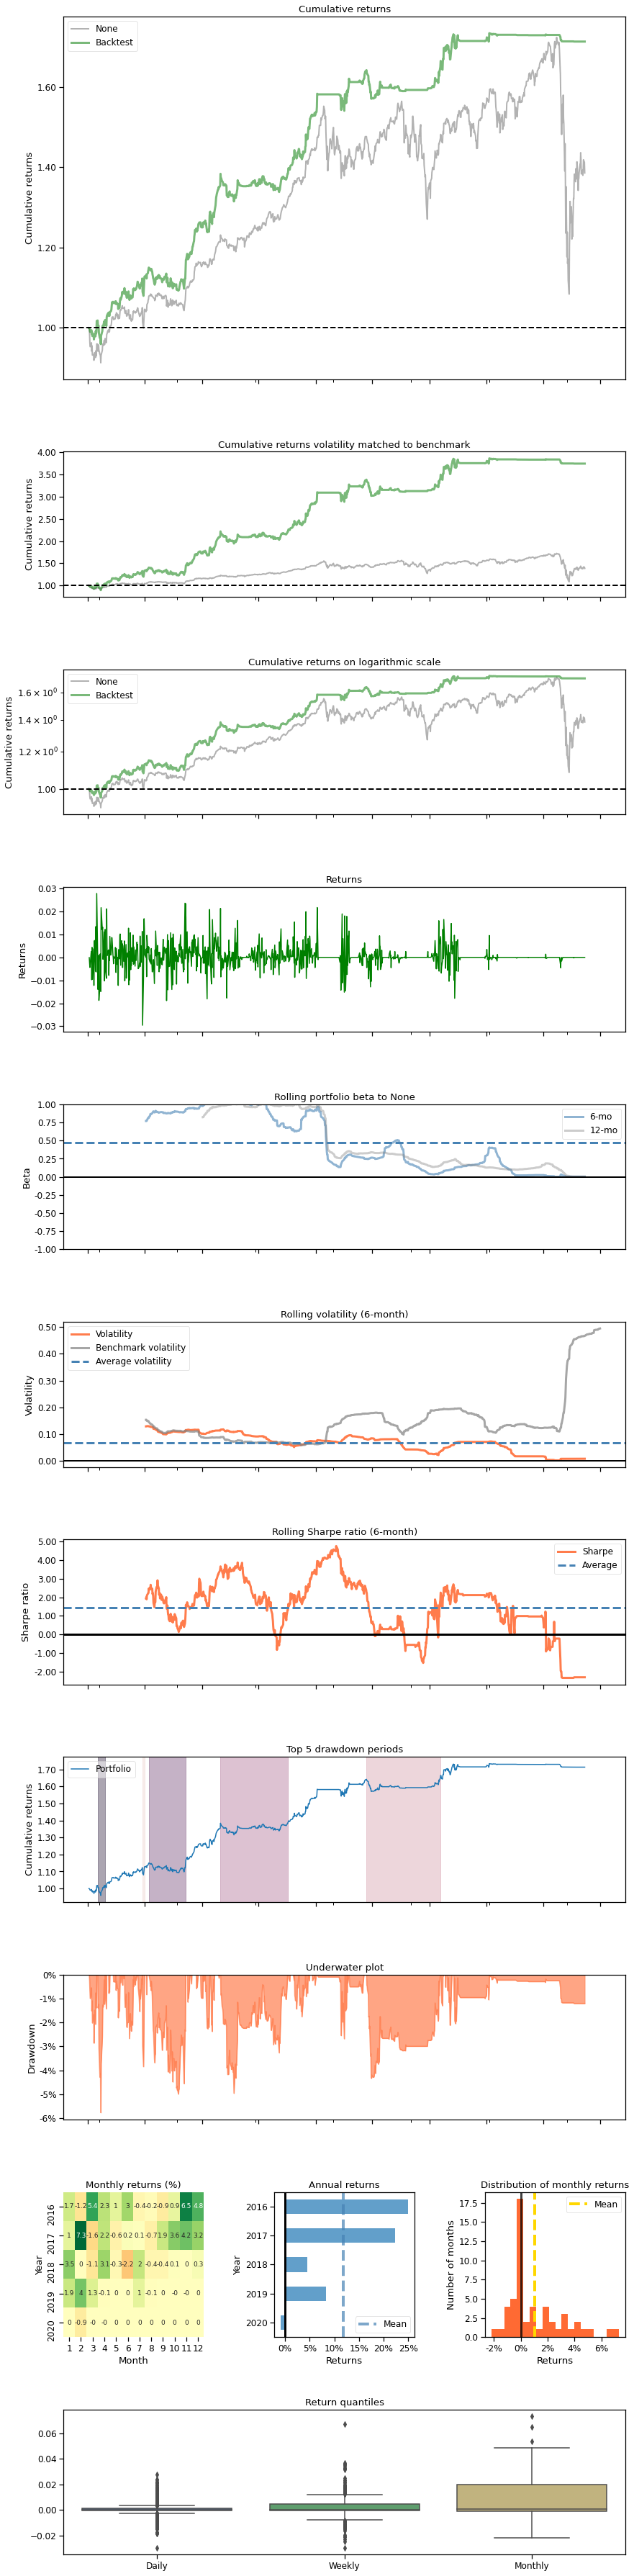

In [23]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = ensemble_strat,
                                   benchmark_rets=dow_strat, set_context=False)